# Bank Marketing - Exploratory Data Analysis

## Objective
The goal of this section is to perform an exploratory analysis of the Bank Marketing dataset to understand the data distribution, identify patterns, and uncover relationships between features and the target variable (term deposit subscription).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading and Overview

In [ ]:
# Load the dataset
# Using the same path as the modeling notebook
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Display first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Dataset info
print(f"Shape of dataset: {df.shape}")
df.info()

Shape of dataset: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  c

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Data already cleaned. No missing data
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## 2. Target Variable (`y`)

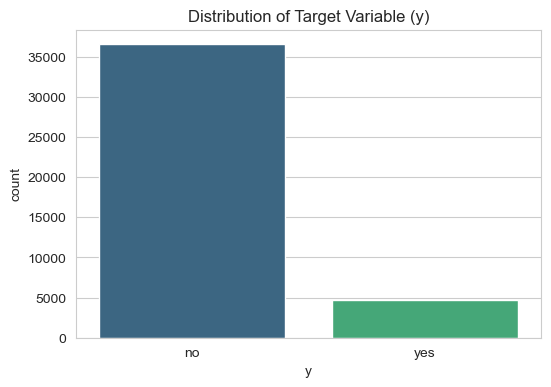

Class Distribution:
y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribution of Target Variable (y)')
plt.show()

# Calculate class imbalance
target_counts = df['y'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{target_counts}")

## 3. Univariate Analysis
Analyzing independent variables one by one.

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

In [19]:
# Separate Numerical and Categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'y' from categorical
categorical_cols.remove('y')
    
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Numerical Features Distribution

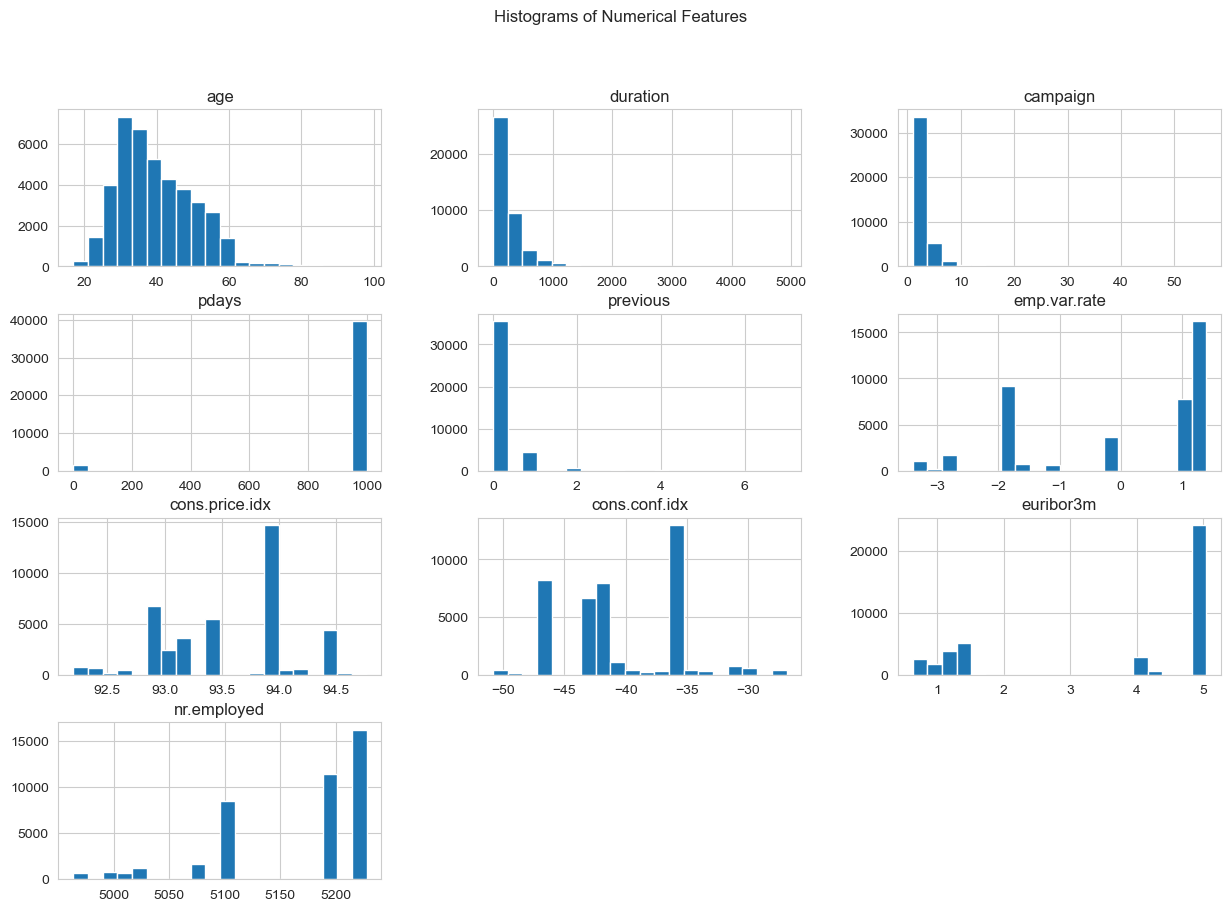

In [20]:
# Plot histograms for numeric features
df[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

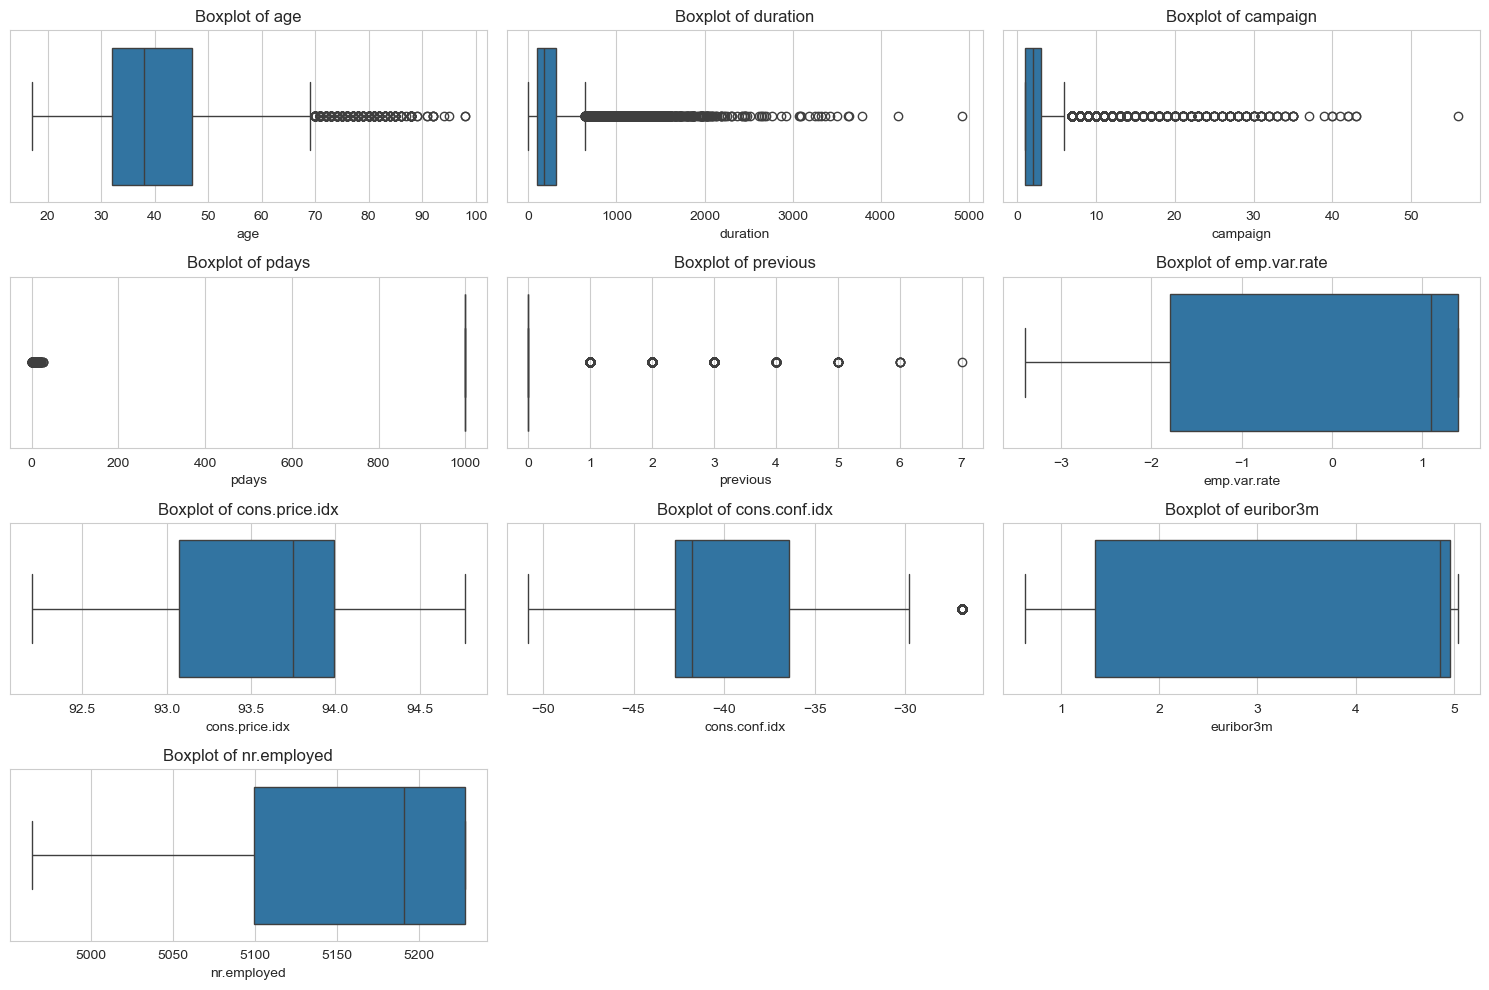

In [21]:
# Boxplots to check outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Categorical Features Distribution

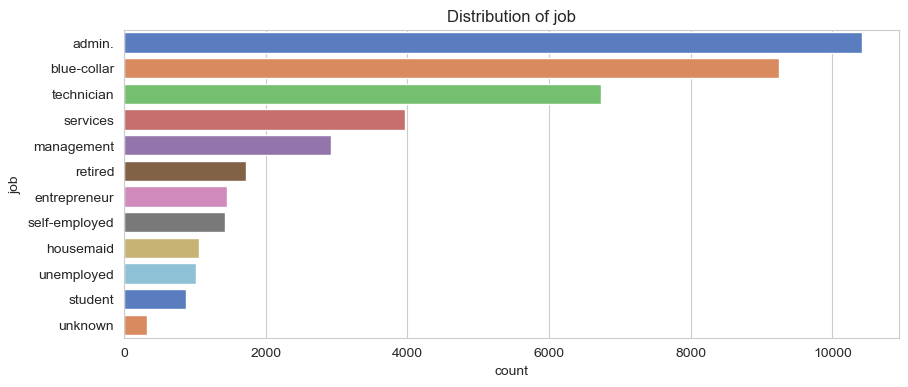

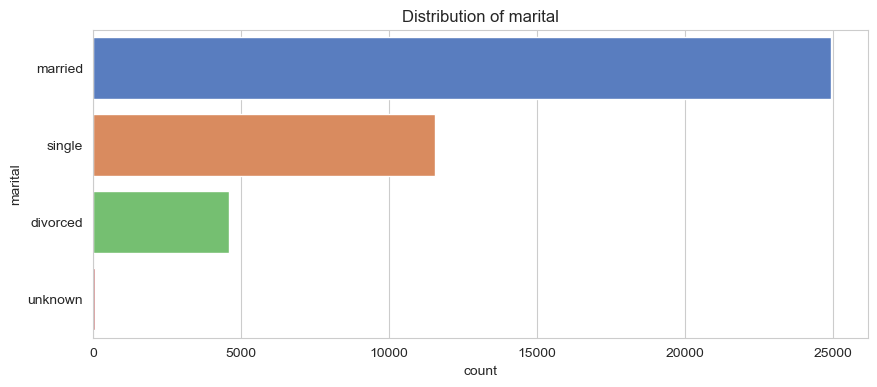

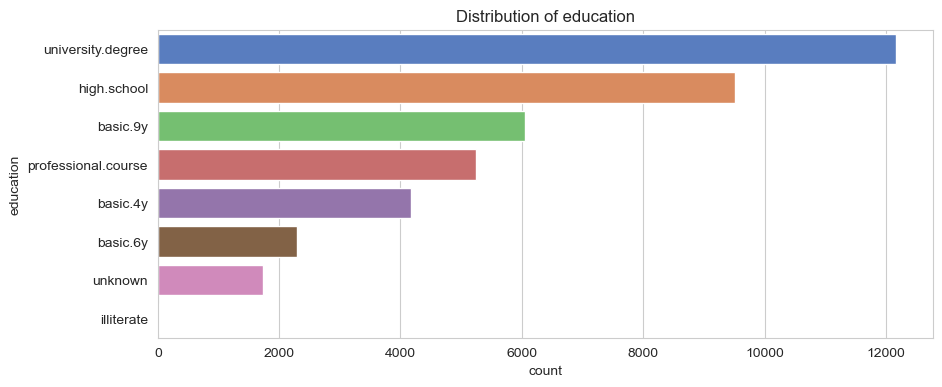

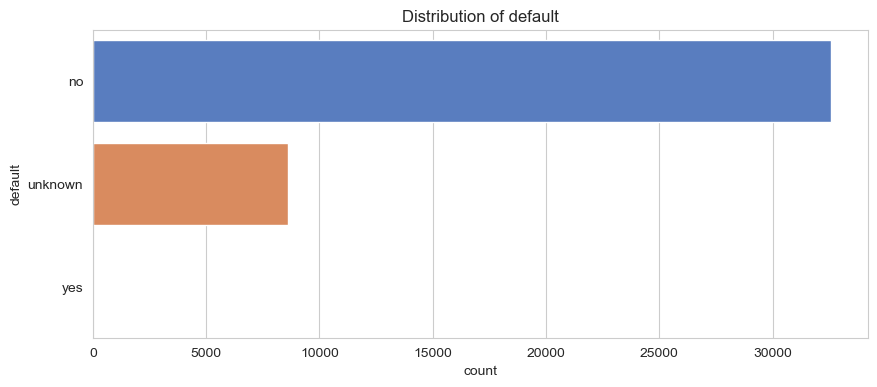

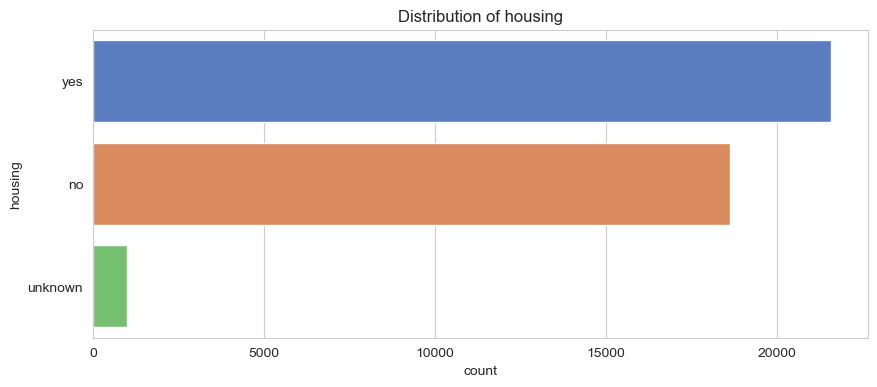

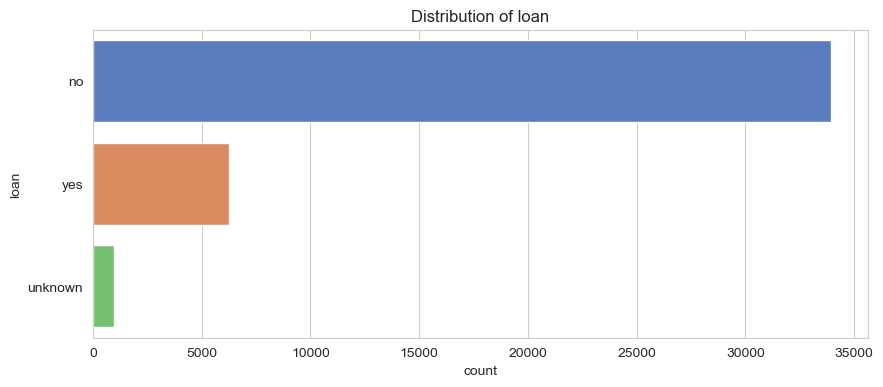

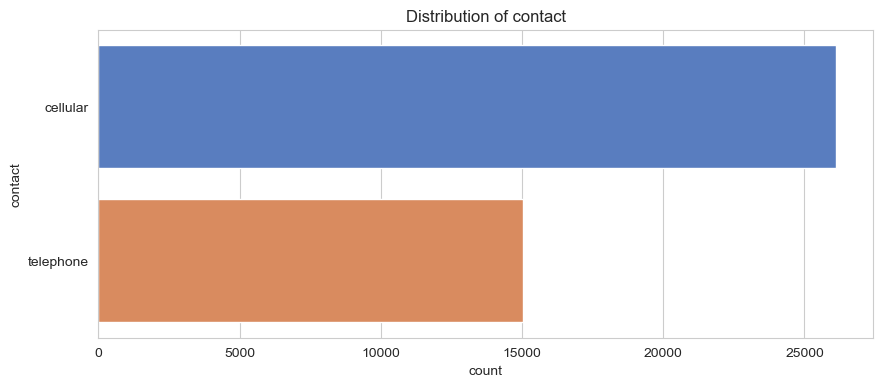

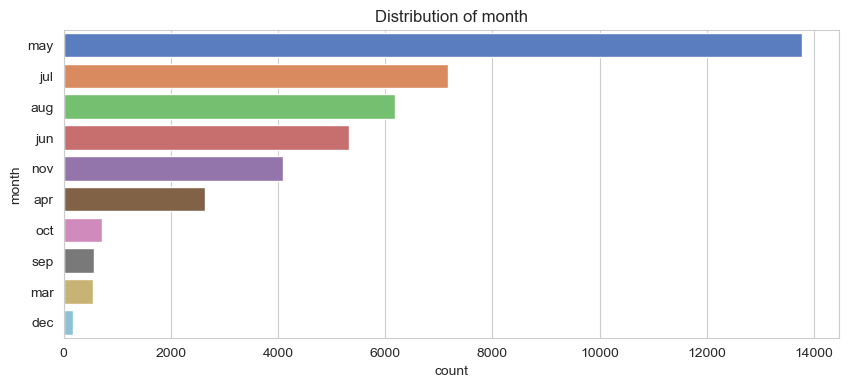

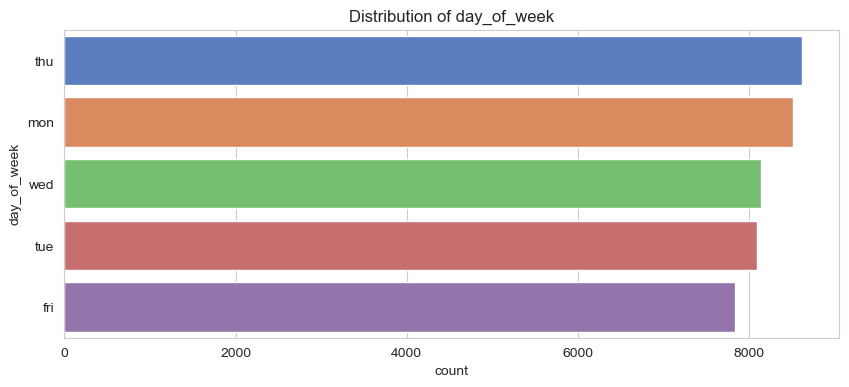

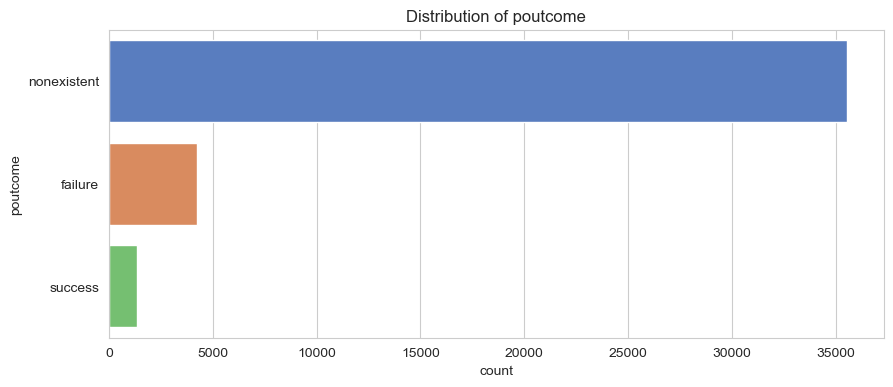

In [22]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')
    plt.title(f'Distribution of {col}')
    plt.show()

## 4. Bivariate Analysis
Analyzing the relationship between features and the target variable.

### Numeric vs Target

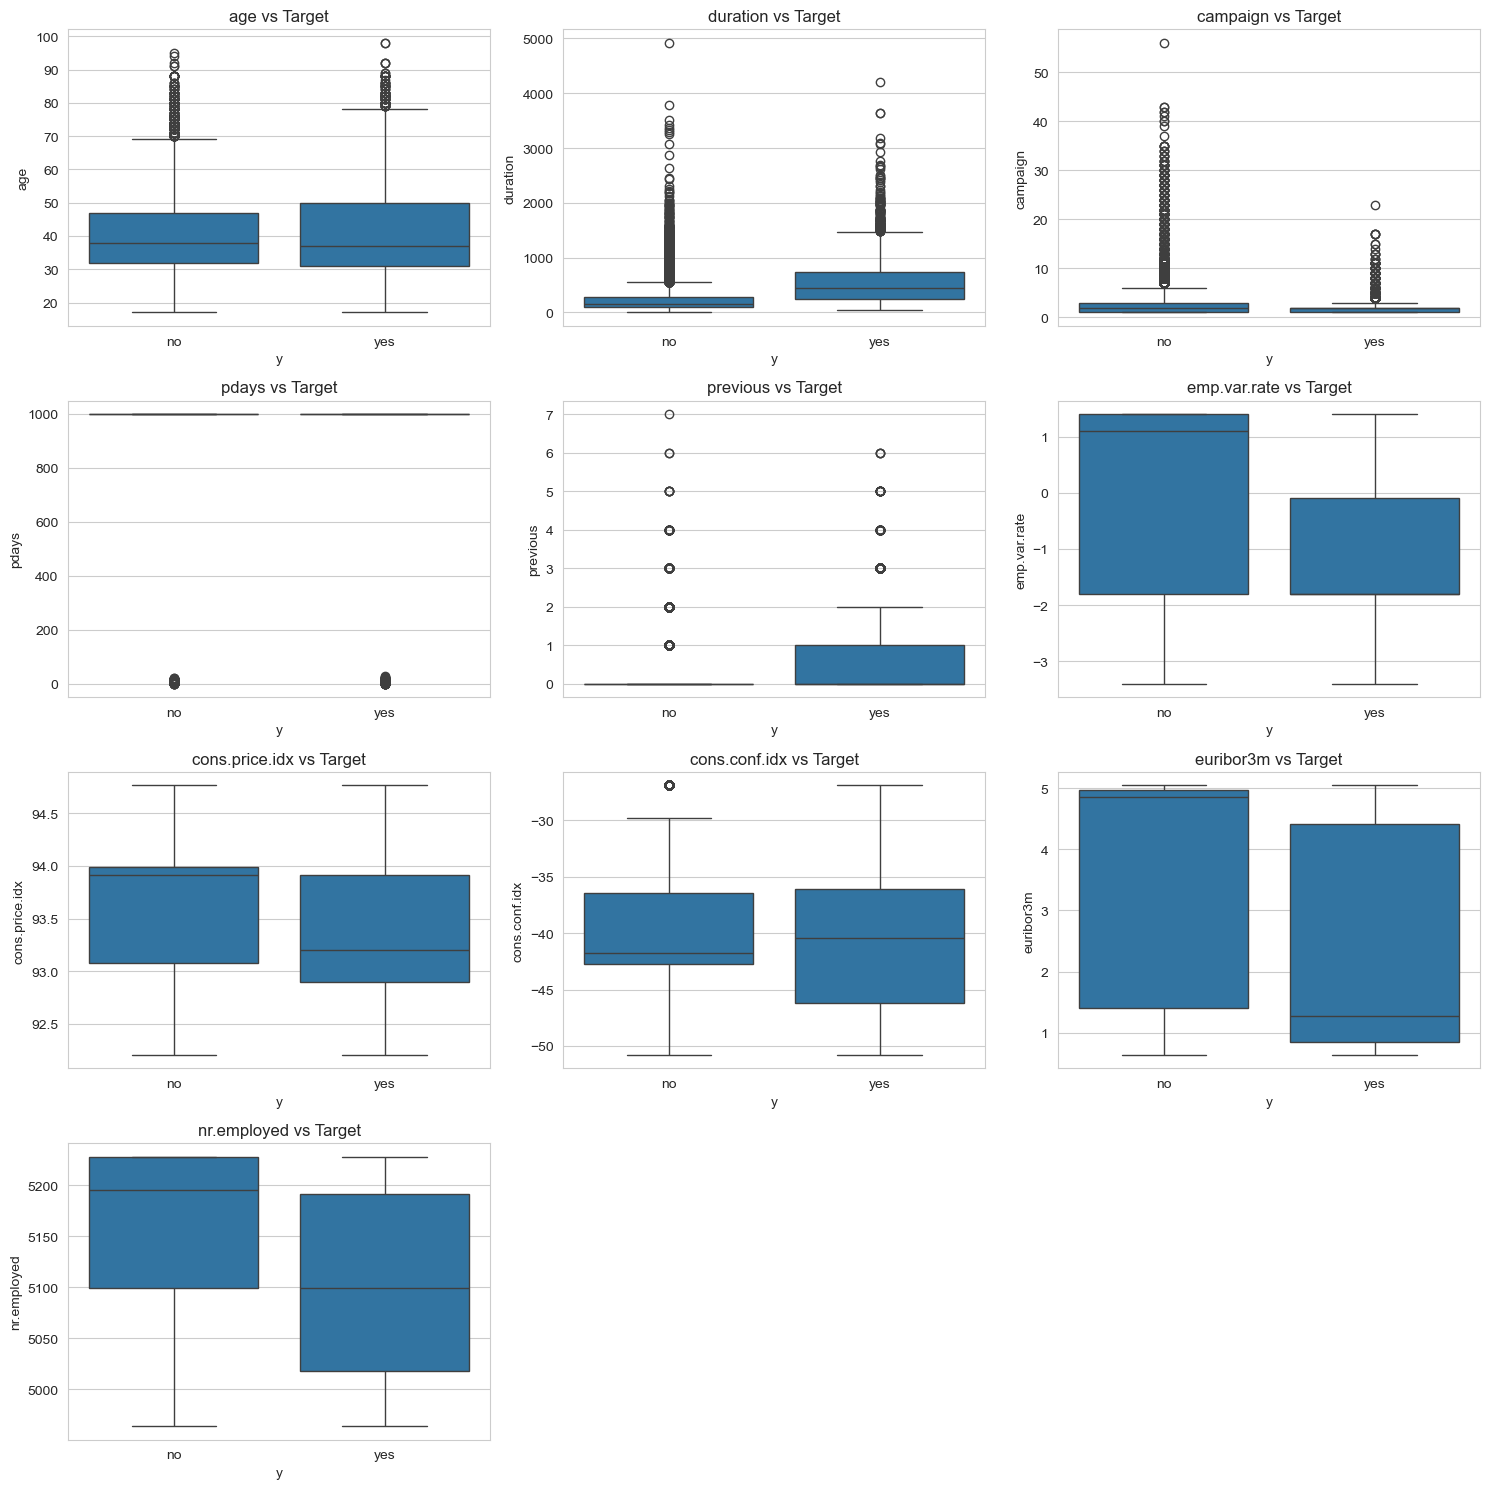

In [24]:
# Boxplots of Numeric features by Target
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

Key observations here usually include:
- `duration`: Often shows a very strong relationship (longer calls -> higher subscription rate), but be careful as this is not known before the call.
- `euribor3m`, `nr_employed`: Economic indicators usually show distinct distributions for 'yes' vs 'no'.

### Categorical vs Target

In [27]:
df.groupby(col)['y'].value_counts(normalize=True).unstack()

y,no,yes
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911676,0.088324
success,0.348871,0.651129


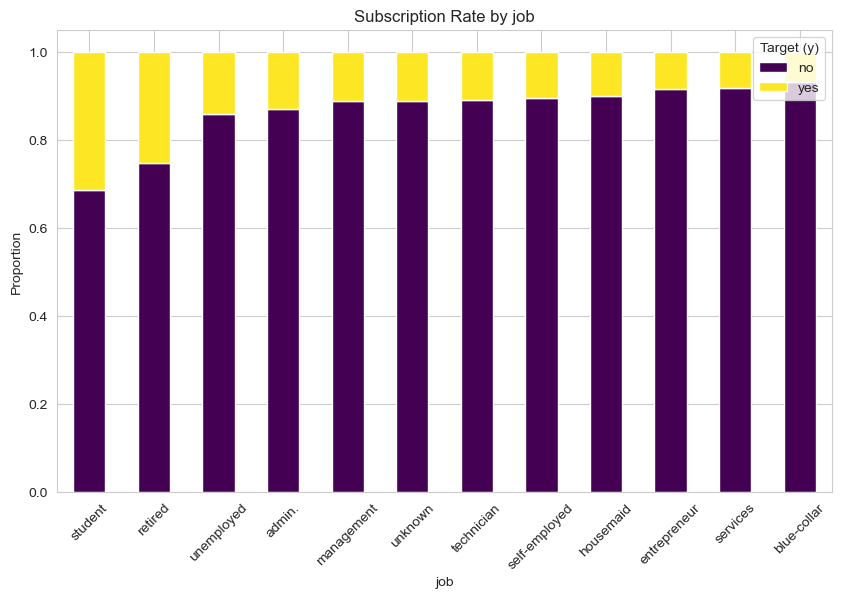

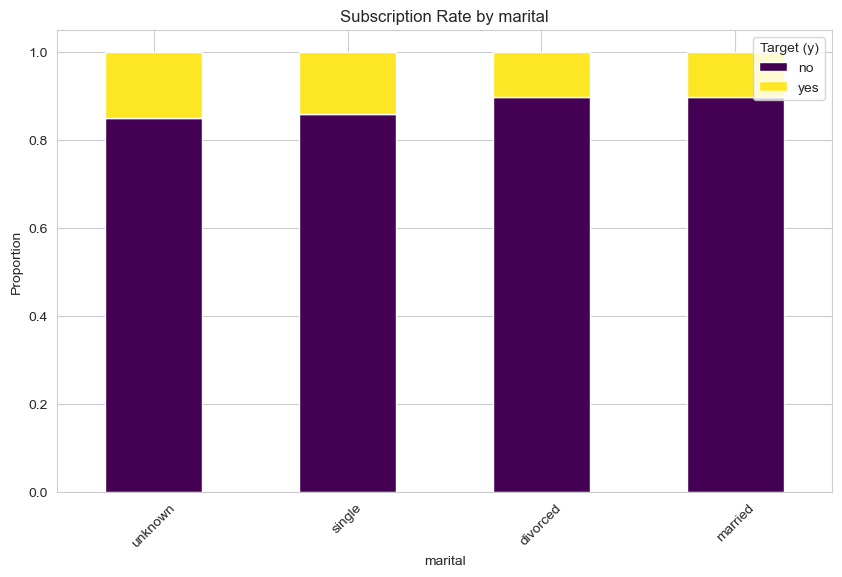

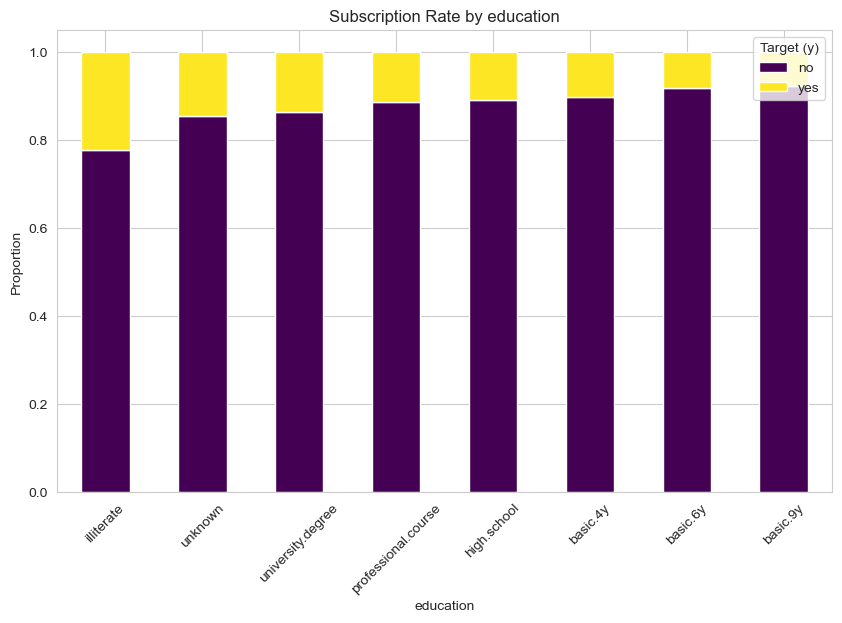

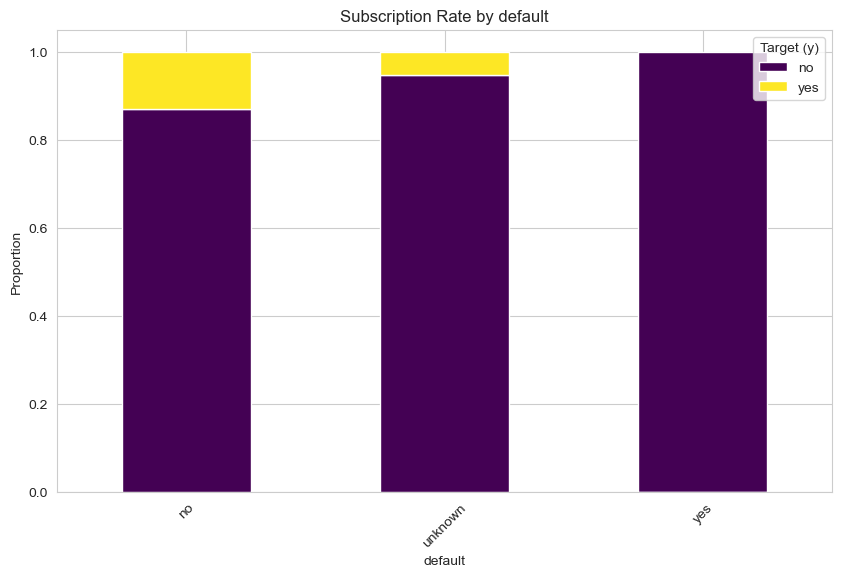

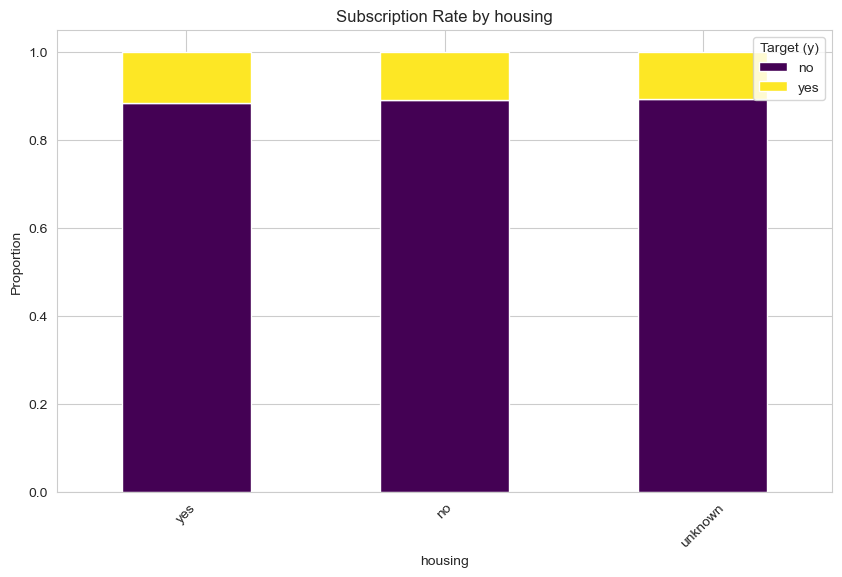

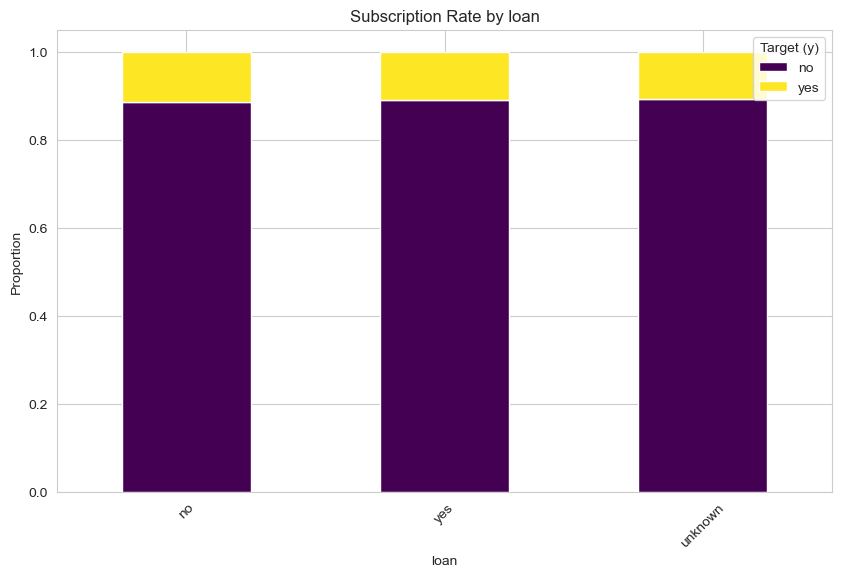

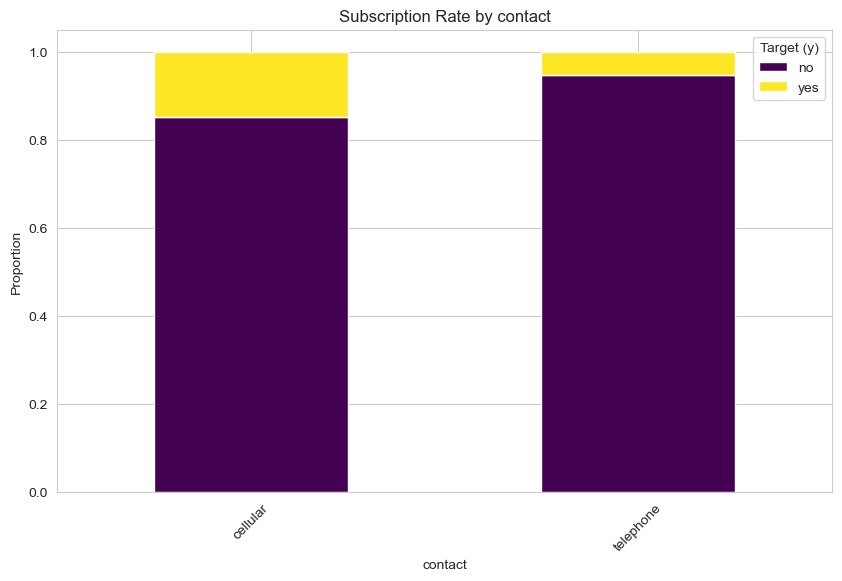

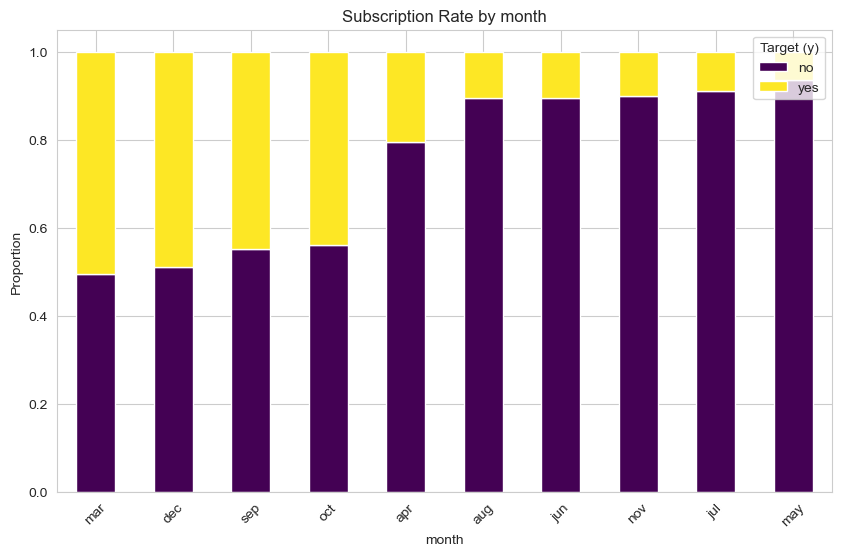

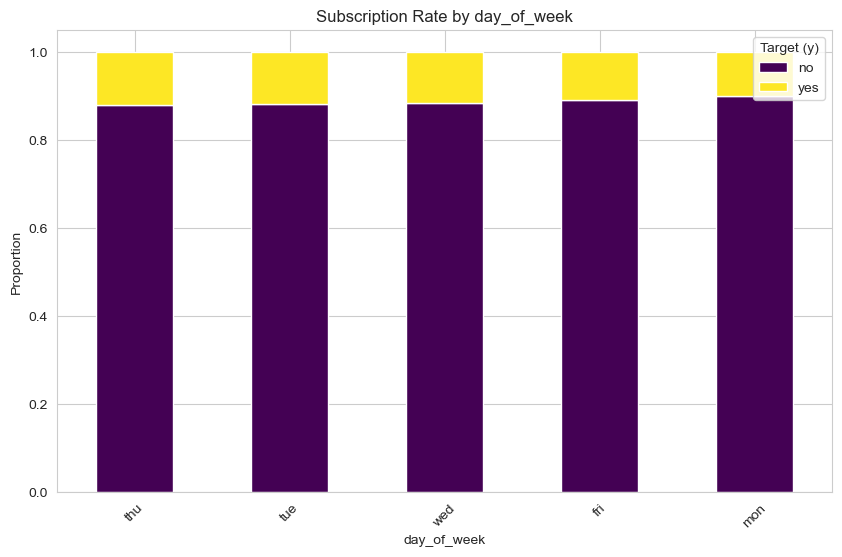

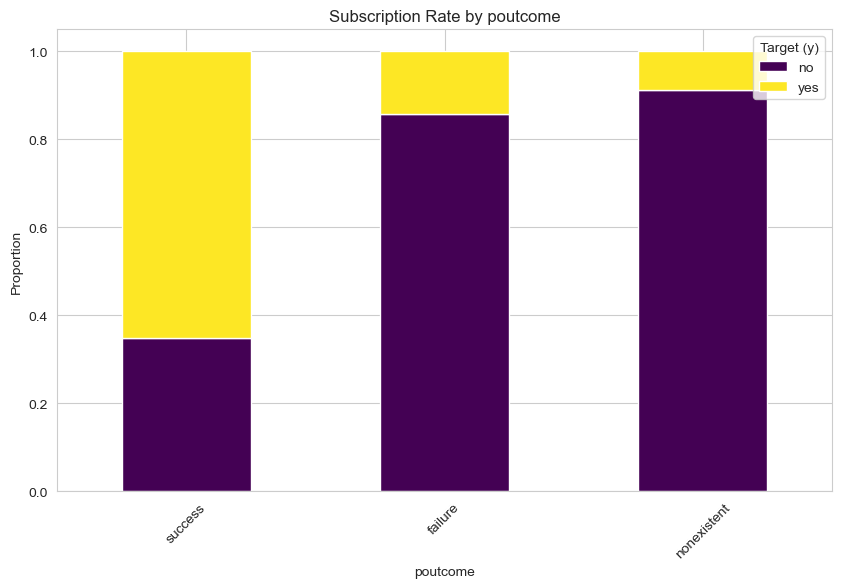

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Calculate proportion of 'yes' for each category
    prop_df = df.groupby(col)['y'].value_counts(normalize=True).unstack()
    if 'yes' in prop_df.columns:
        prop_df = prop_df.sort_values('yes', ascending=False)
    
    prop_df.plot(kind='bar', stacked=True, colormap='viridis', rot=45)
    plt.title(f'Subscription Rate by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Target (y)', loc='upper right')
    plt.show()

## 5. Correlation Analysis

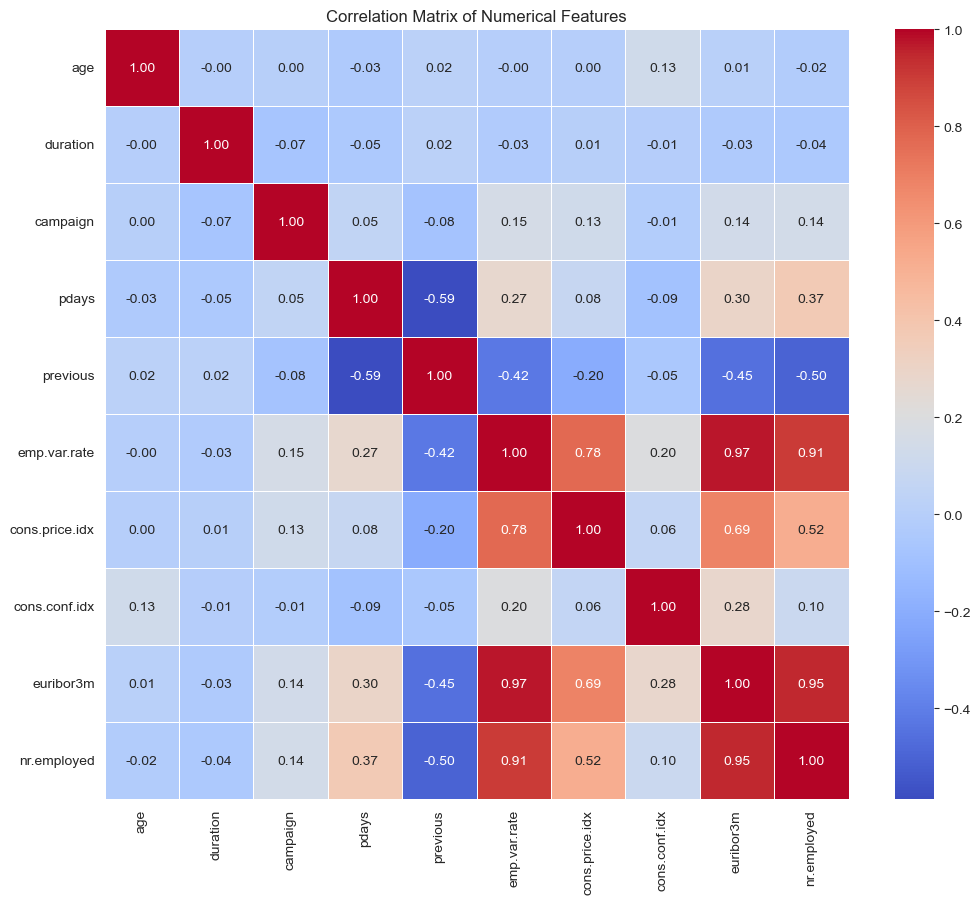

In [31]:
# Correlation Matrix for numerical features
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Strong correlations to note:
- `emp.var.rate`, `euribor3m`, `nr.employed` are often highly correlated with each other, representing the economic context.